In [2]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime


2025-09-29 18:55:43.616841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759172143.837094      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759172143.902376      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [4]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


In [5]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1759172407.272492      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759172407.273335      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35


I0000 00:00:1759172411.844997     101 service.cc:148] XLA service 0x794898010b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759172411.845684     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759172411.845705     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759172412.212887     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


 12/246 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0309 - loss: 15.4700

I0000 00:00:1759172417.132833     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


246/246 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.4551 - loss: 3.3876 - val_accuracy: 0.9192 - val_loss: 0.3376
Epoch 2/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9302 - loss: 0.2691 - val_accuracy: 0.9847 - val_loss: 0.0756
Epoch 3/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9715 - loss: 0.1090 - val_accuracy: 0.9694 - val_loss: 0.1219
Epoch 4/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9783 - loss: 0.0835 - val_accuracy: 0.9893 - val_loss: 0.0499
Epoch 5/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9829 - loss: 0.0651 - val_accuracy: 0.9916 - val_loss: 0.0461
Epoch 6/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9862 - loss: 0.0539 - val_accuracy: 0.9898 - val_loss: 0.0616
Epoch 7/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9756 - loss: 0.1171 - val_accuracy: 0.9940 - val_loss: 0.0306
Epoch 8/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9903 - loss: 0.0343 - val_accuracy: 0.99

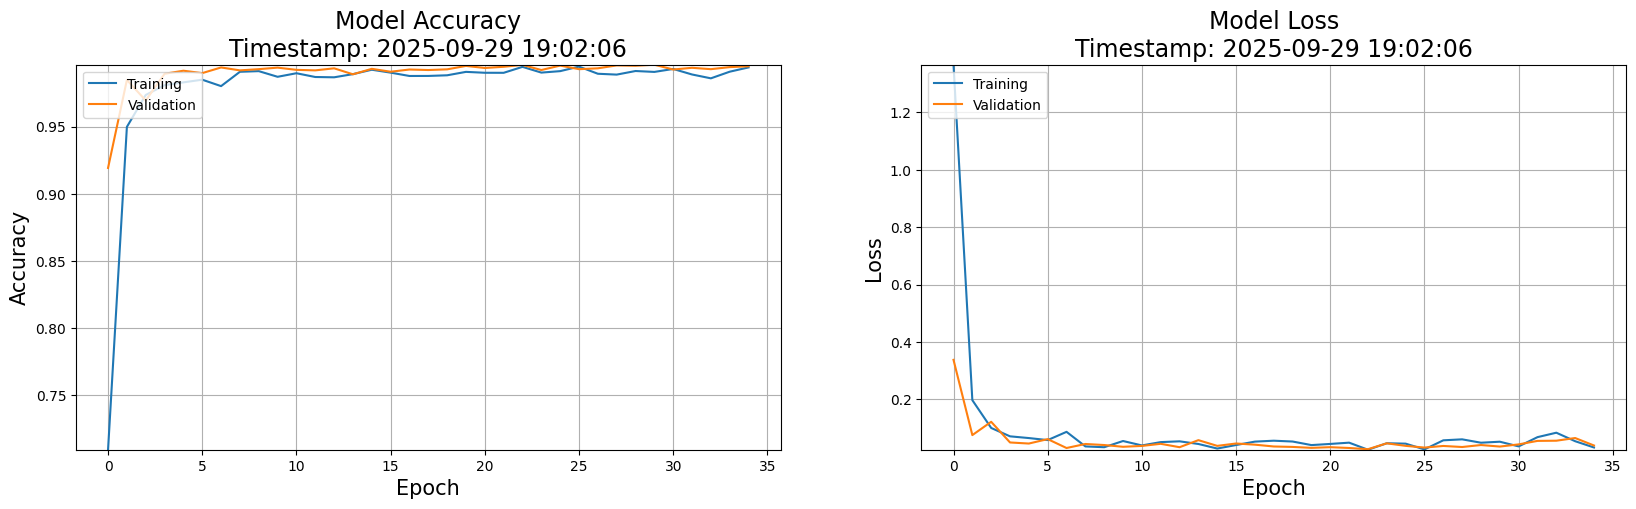

In [9]:
plot_performance(history=history1)

In [10]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)


In [11]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
0.9707838479809976


In [12]:
# Saving the Model 
model.save('traffic_classifier.h5')

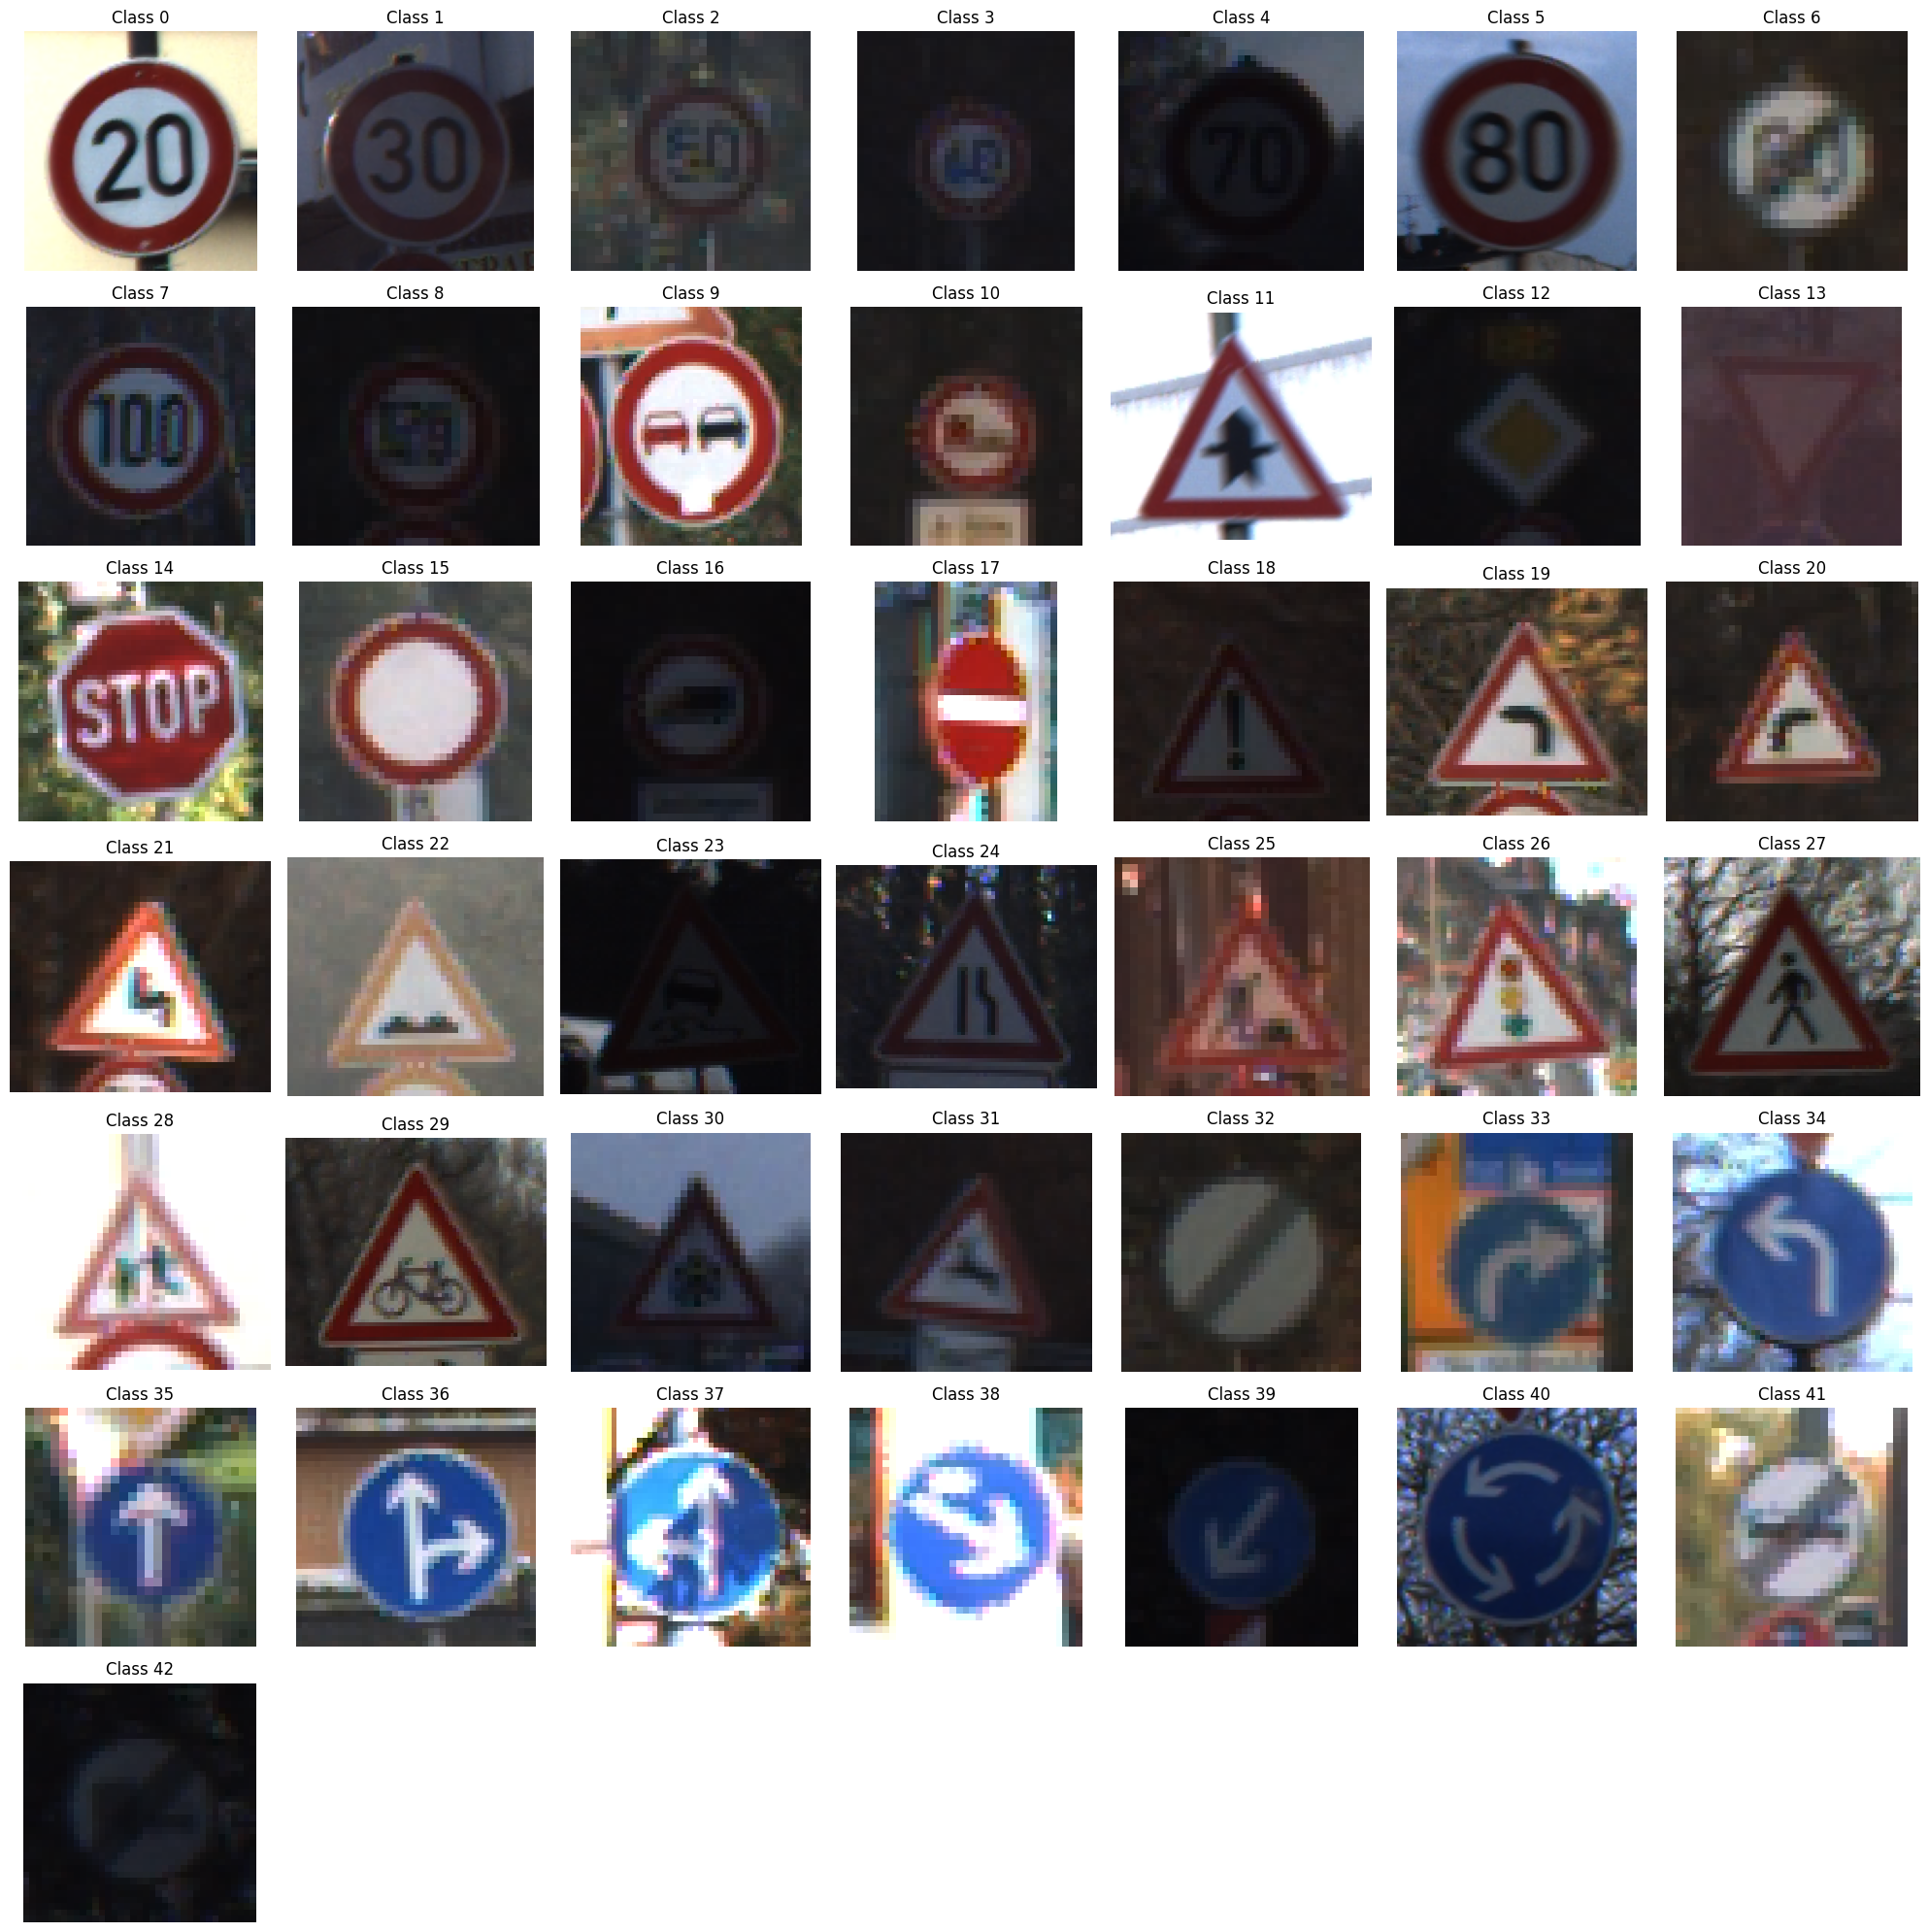

In [13]:
import os
import matplotlib.pyplot as plt
import cv2

# Path to training dataset (update agar alag folder ho)
train_path = "../input/gtsrb-german-traffic-sign/train"

# Total classes
num_classes = 43  

plt.figure(figsize=(20, 20))

for class_id in range(num_classes):
    # class folder ka path
    class_dir = os.path.join(train_path, str(class_id))
    
    # us class ki ek sample image pick karna
    sample_img = os.listdir(class_dir)[0]  # first image
    
    # image read
    img_path = os.path.join(class_dir, sample_img)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # plot
    plt.subplot(7, 7, class_id+1)  # 7x7 grid (49 spots)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Class {class_id}")
    
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


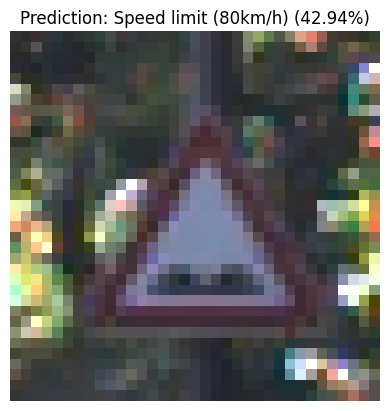

(5, 'Speed limit (80km/h)', 0.42941824)

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/kaggle/working/traffic_classifier.h5")

# Total number of classes
num_classes = 43  

# Agar tumhare pass classId to className mapping dictionary hai
traffic_signs = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 tons', 11: 'Right-of-way at intersection',
    12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles',
    16: 'Vehicles > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution',
    19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve',
    22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right',
    25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians',
    28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow',
    31: 'Wild animals crossing', 32: 'End of all speed and passing limits',
    33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only',
    36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right',
    39: 'Keep left', 40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End no passing vehicles > 3.5 tons'
}

# Function to predict an image
def predict_traffic_sign(image_path):
    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize to model input size
    img_resized = cv2.resize(img_rgb, (30, 30))
    
    # Normalize
    img_normalized = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)  # shape (1,30,30,3)
    
    # Prediction
    pred = model.predict(img_input)
    class_id = np.argmax(pred)
    confidence = np.max(pred)
    
    # Show result
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Prediction: {traffic_signs[class_id]} ({confidence*100:.2f}%)")
    plt.show()
    
    return class_id, traffic_signs[class_id], confidence

# Example: apna image path pass karo
predict_traffic_sign("/kaggle/input/gtsrb-german-traffic-sign/Train/22/00022_00000_00001.png")


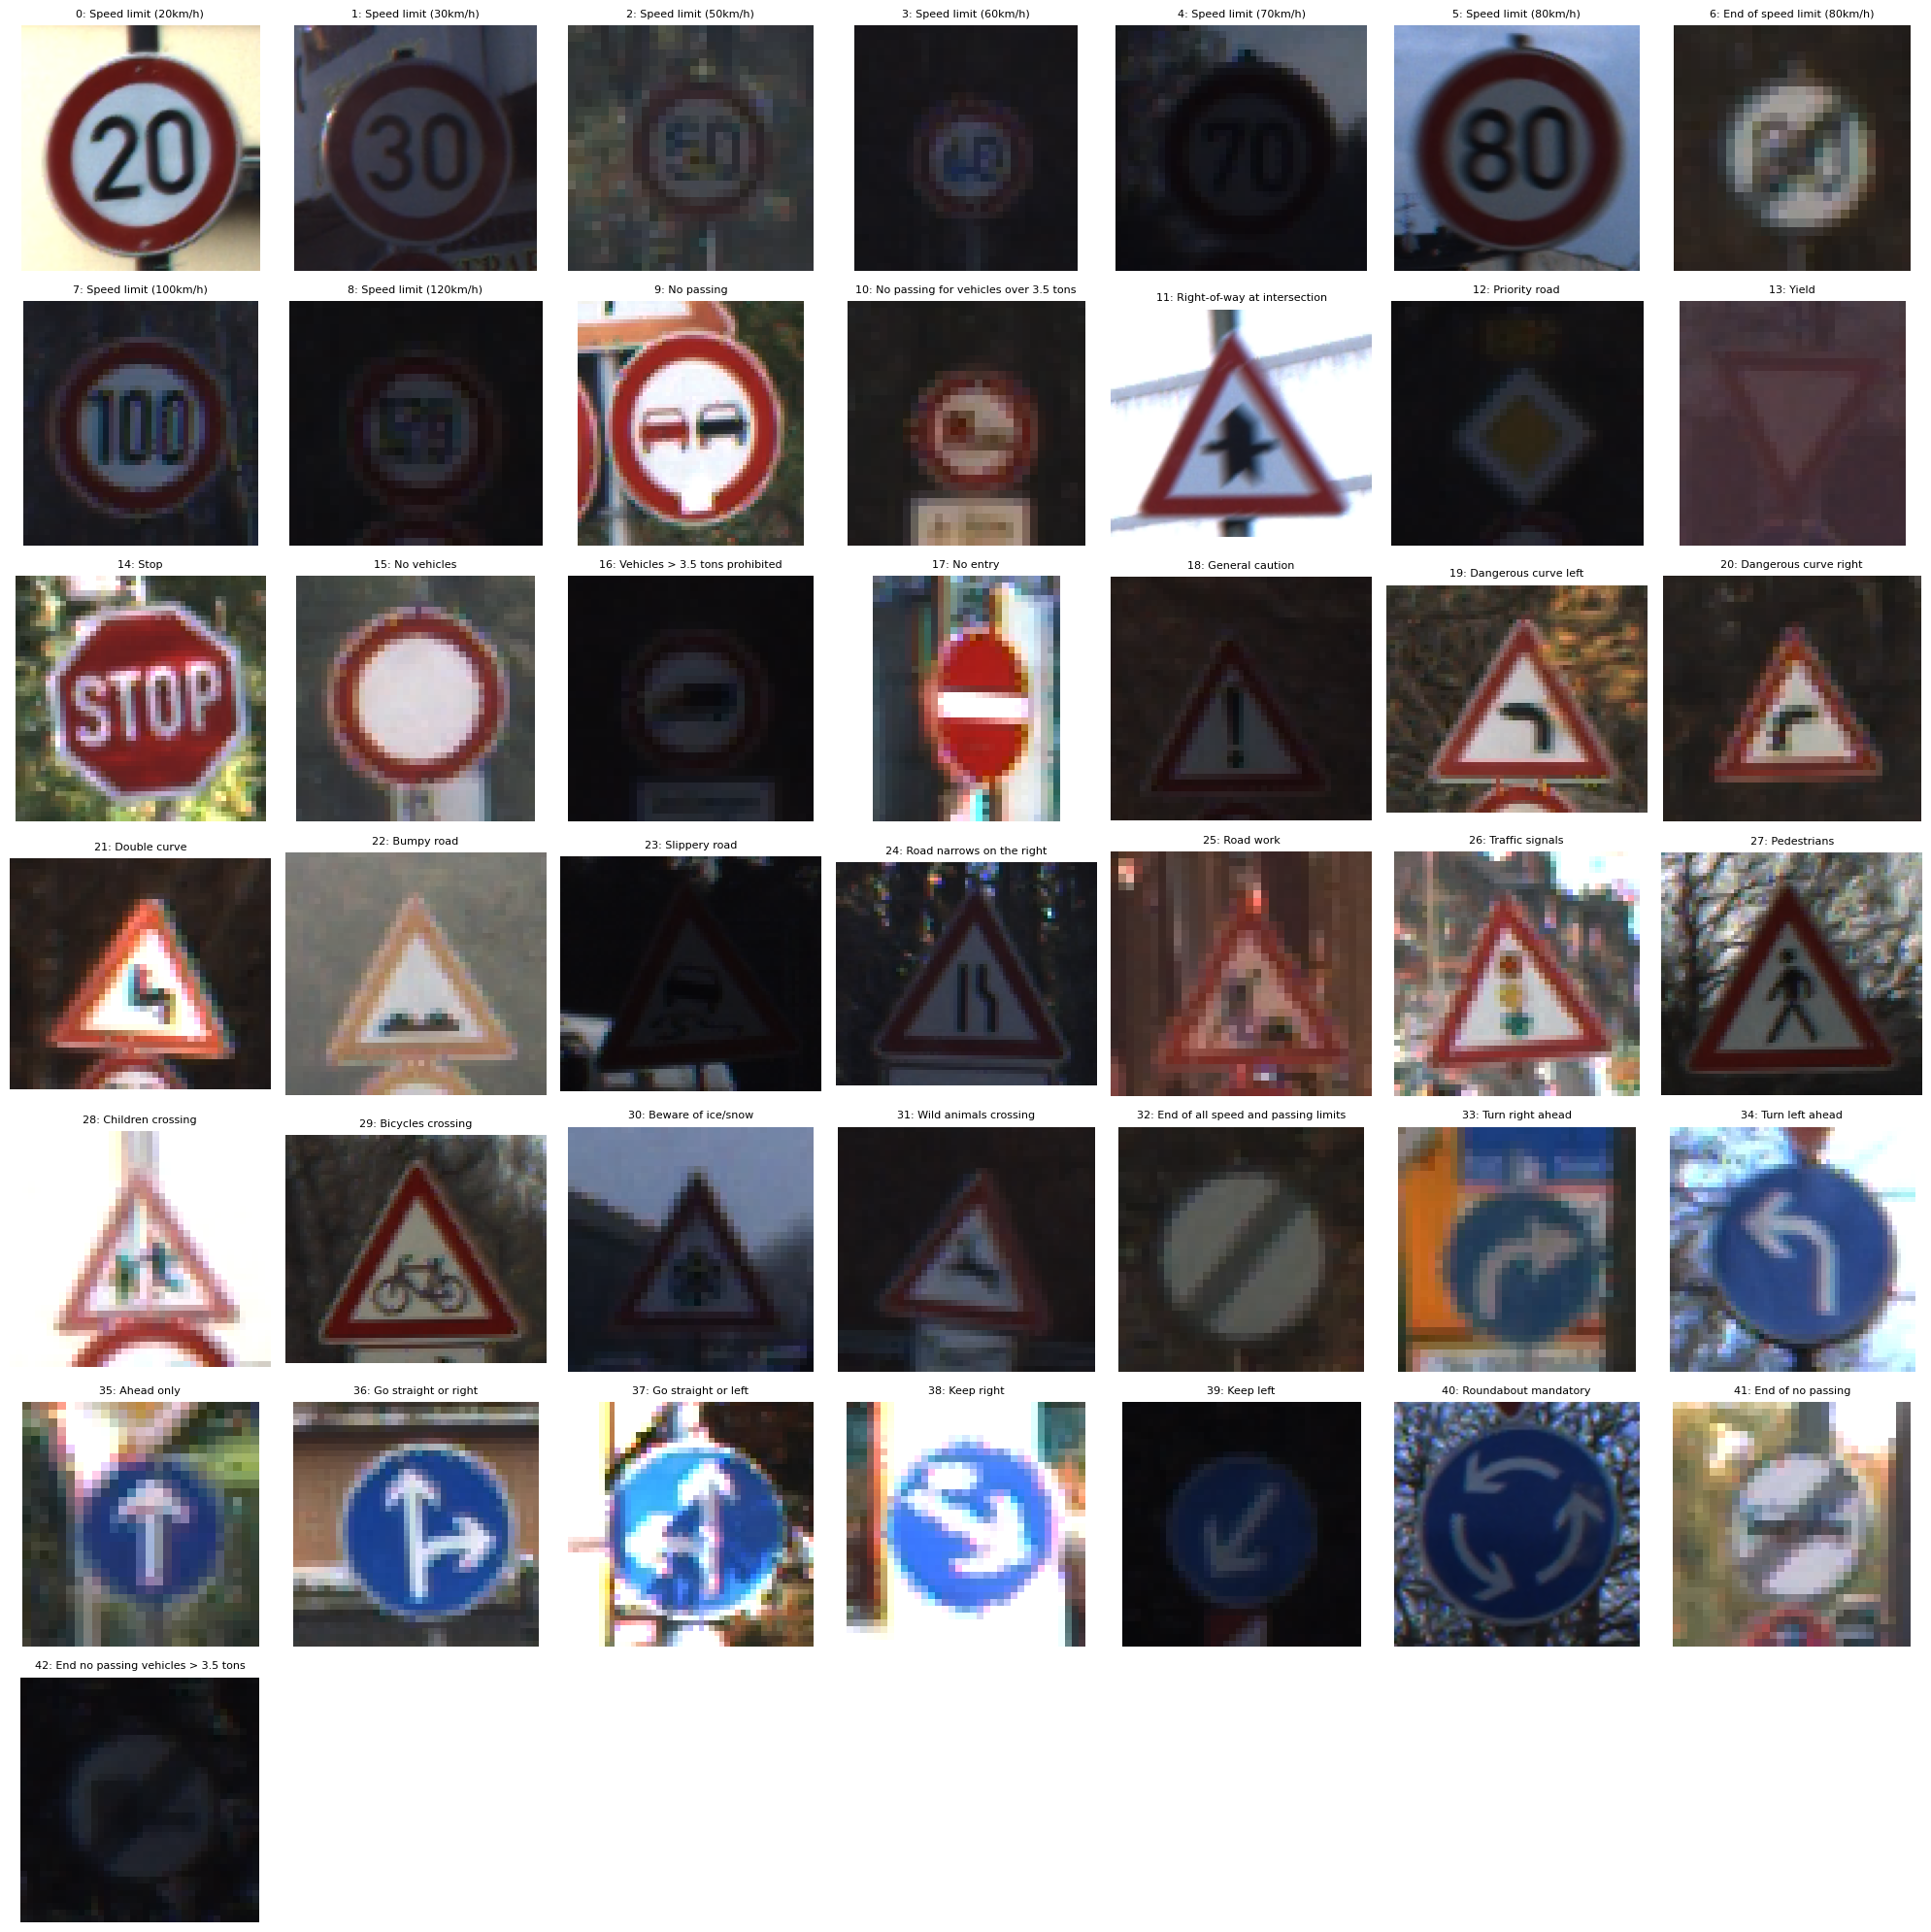

In [26]:
import os
import matplotlib.pyplot as plt
import cv2

# Path to training dataset (update agar alag folder ho)
train_path = "../input/gtsrb-german-traffic-sign/train"

# ClassId to ClassName mapping
traffic_signs = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 tons', 11: 'Right-of-way at intersection',
    12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles',
    16: 'Vehicles > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution',
    19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve',
    22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right',
    25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians',
    28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow',
    31: 'Wild animals crossing', 32: 'End of all speed and passing limits',
    33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only',
    36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right',
    39: 'Keep left', 40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End no passing vehicles > 3.5 tons'
}

# Total classes
num_classes = 43  

plt.figure(figsize=(20, 20))

for class_id in range(num_classes):
    # class folder ka path
    class_dir = os.path.join(train_path, str(class_id))
    
    # us class ki ek sample image pick karna
    sample_img = os.listdir(class_dir)[0]  # first image
    
    # image read
    img_path = os.path.join(class_dir, sample_img)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # plot
    plt.subplot(7, 7, class_id+1)  # 7x7 grid (49 spots)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{class_id}: {traffic_signs[class_id]}", fontsize=8)
    
plt.tight_layout()
plt.show()
